In [239]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [240]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


# Preparação dos dados

In [241]:
import pandas as pd

# Caminhos para os arquivos CSV
file_path = './csv_recebidos/Distâncias_aeroportos.csv'  # Arquivo com as distâncias entre aeroportos
file_path1 = './csv_recebidos/Nome_Aeroporto.csv'  # Arquivo com os nomes dos aeroportos

# Carrega os arquivos CSV em DataFrames
df = pd.read_csv(file_path)  # DataFrame com as distâncias
df_nome = pd.read_csv(file_path1)  # DataFrame com os nomes dos aeroportos

# Remove a coluna 'Distance m' do DataFrame de distâncias
df = df.drop('Distance m', axis=1)
df

,InputID,TargetID,Distance km
0,1,2,2095
1,1,3,1448
2,1,4,2294
3,1,5,2318
4,1,6,2337
...,...,...,...
7305,86,81,919
7306,86,82,822
7307,86,83,561
7308,86,84,363


In [242]:
# Renomeia as colunas do DataFrame de distâncias
df.columns = ["InputID", "TargetID", "Distância km"]
df

,InputID,TargetID,Distância km
0,1,2,2095
1,1,3,1448
2,1,4,2294
3,1,5,2318
4,1,6,2337
...,...,...,...
7305,86,81,919
7306,86,82,822
7307,86,83,561
7308,86,84,363


In [243]:
# Cria um mapeamento de IDs para nomes dos aeroportos
mapa_ids = {i+1: nome for i, nome in enumerate(df_nome['Aeroporto'])}

# Substitui os IDs nas colunas 'InputID' e 'TargetID' pelos nomes dos aeroportos
df['InputID'] = df['InputID'].replace(mapa_ids)
df['TargetID'] = df['TargetID'].replace(mapa_ids)

# Adiciona uma coluna de emissão de CO2 com base na distância
df['Emissão de CO2'] = df['Distância km'] * 0.123
df

,InputID,TargetID,Distância km,Emissão de CO2
0,Aeroporto Internacional de Guarulhos,Aeroporto Internacional do Recife,2095,257.685
1,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de Salvador,1448,178.104
2,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de Natal,2294,282.162
3,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de São Luís,2318,285.114
4,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de Fortaleza,2337,287.451
...,...,...,...,...
7305,Aeroporto Internacional de Porto Alegre,Aeroporto Internacional de São José dos Campos,919,113.037
7306,Aeroporto Internacional de Porto Alegre,Aeroporto Internacional de Viracopos,822,101.106
7307,Aeroporto Internacional de Porto Alegre,Aeroporto Internacional de Curitiba,561,69.003
7308,Aeroporto Internacional de Porto Alegre,Aeroporto Internacional de Florianópolis,363,44.649


In [244]:
# Função para formatar horas no formato HH:MM
def format_time(hours):
    h = int(hours)
    m = int((hours - h) * 60)
    return f"{h:02}:{m:02}"

# Calcula o tempo médio de voo para aeronaves comerciais
df['Tempo Médio Horas - Comercial'] = df['Distância km'].apply(
    lambda d: f"{format_time(d / 900)} ~ {format_time(d / 850)}"
)

# Calcula o tempo médio de voo para aeronaves cargueiras
df['Tempo Médio Horas - Cargueiro'] = df['Distância km'].apply(
    lambda d: f"{format_time(d / 850)} ~ {format_time(d / 800)}"
)

df


,InputID,TargetID,Distância km,Emissão de CO2,Tempo Médio Horas - Comercial,Tempo Médio Horas - Cargueiro
0,Aeroporto Internacional de Guarulhos,Aeroporto Internacional do Recife,2095,257.685,02:19 ~ 02:27,02:27 ~ 02:37
1,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de Salvador,1448,178.104,01:36 ~ 01:42,01:42 ~ 01:48
2,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de Natal,2294,282.162,02:32 ~ 02:41,02:41 ~ 02:52
3,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de São Luís,2318,285.114,02:34 ~ 02:43,02:43 ~ 02:53
4,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de Fortaleza,2337,287.451,02:35 ~ 02:44,02:44 ~ 02:55
...,...,...,...,...,...,...
7305,Aeroporto Internacional de Porto Alegre,Aeroporto Internacional de São José dos Campos,919,113.037,01:01 ~ 01:04,01:04 ~ 01:08
7306,Aeroporto Internacional de Porto Alegre,Aeroporto Internacional de Viracopos,822,101.106,00:54 ~ 00:58,00:58 ~ 01:01
7307,Aeroporto Internacional de Porto Alegre,Aeroporto Internacional de Curitiba,561,69.003,00:37 ~ 00:39,00:39 ~ 00:42
7308,Aeroporto Internacional de Porto Alegre,Aeroporto Internacional de Florianópolis,363,44.649,00:24 ~ 00:25,00:25 ~ 00:27


In [245]:
# Lista de aeroportos de interesse
aeroportos_interesse = [
    "Aeroporto Internacional de Guarulhos",
    "Aeroporto Internacional do Recife",
    "Aeroporto Internacional de Salvador",
    "Aeroporto Internacional de Natal",
    "Aeroporto Internacional de São Luís",
    "Aeroporto Internacional de Fortaleza",
    "Aeroporto Internacional de Brasília",
    "Aeroporto Internacional de Várzea Grande",
    "Aeroporto Internacional de Belém",
    "Aeroporto Internacional de Tabatinga",
    "Aeroporto Internacional de Manaus",
    "Aeroporto Internacional de Macapá",
    "Aeroporto Internacional de Maceió",
    "Aeroporto Internacional de Aracaju",
    "Aeroporto Internacional de Belo Horizonte",
    "Aeroporto Santos Dumont",
    "Aeroporto Internacional do Rio de Janeiro",
    "Aeroporto Internacional de Vitória",
    "Aeroporto Internacional de São José dos Campos",
    "Aeroporto Internacional de Viracopos",
    "Aeroporto Internacional de Curitiba",
    "Aeroporto Internacional de Florianópolis",
    "Aeroporto Internacional de Navegantes",
    "Aeroporto Internacional de Porto Alegre"
]

# Gera uma lista de aeroportos de origem únicos
lista_origem = df['InputID'].unique().tolist()

# Remove os aeroportos de interesse da lista de origem
for i in aeroportos_interesse:
    try:
        lista_origem.remove(i)
    except ValueError:
        pass

lista_origem

['Aeroporto Internacional de Nursultan Nazarbayev',
 'Aeroporto Internacional de Xangai Pudong',
 'Aeroporto Internacional de Pequim Capital',
 'Aeroporto Internacional de Pyongyang Sunan',
 'Aeroporto Internacional de Incheon',
 'Aeroporto Internacional Ninoy Aquino',
 'Aeroporto Internacional de Hong Kong',
 'Aeroporto Internacional Indira Gandhi',
 'Aeroporto Internacional Soekarno-Hatta (Jacarta)',
 'Aeroporto Internacional Ngurah Rai (Bali)',
 'Aeroporto Internacional de Narita (Tóquio)',
 'Aeroporto Internacional de Haneda (Tóquio)',
 'Aeroporto Internacional de Kansai (Osaka)',
 'Aeroporto Internacional de Wattay (Vientiane)',
 'Aeroporto Internacional de Kuala Lumpur (Sepang)',
 'Aeroporto Internacional de Penang (Penang)',
 'Aeroporto Internacional de Malé',
 'Aeroporto Internacional de Changi',
 'Aeroporto Internacional de Suvarnabhumi',
 'Aeroporto Internacional Don Mueang',
 'Aeroporto Internacional de Taiwan Taoyuan',
 'Aeroporto Internacional de Tan Son Nhat',
 'Aeroporto

In [246]:
# Dicionário de aeroportos por estado
aeroportos_estado = {
    "Alagoas": ["Aeroporto Internacional de Maceió"],
    "Amapá": ["Aeroporto Internacional de Macapá"],
    "Amazonas": [
        "Aeroporto Internacional de Tabatinga",
        "Aeroporto Internacional de Manaus"
    ],
    "Bahia": ["Aeroporto Internacional de Salvador"],
    "Ceará": ["Aeroporto Internacional de Fortaleza"],
    "Distrito Federal": ["Aeroporto Internacional de Brasília"],
    "Espírito Santo": ["Aeroporto Internacional de Vitória"],
    "Maranhão": ["Aeroporto Internacional de São Luís"],
    "Mato Grosso": ["Aeroporto Internacional de Várzea Grande"],
    "Minas Gerais": ["Aeroporto Internacional de Belo Horizonte"],
    "Pará": ["Aeroporto Internacional de Belém"],
    "Paraná": ["Aeroporto Internacional de Curitiba"],
    "Pernambuco": ["Aeroporto Internacional do Recife"],
    "Rio de Janeiro": [
        "Aeroporto Santos Dumont",
        "Aeroporto Internacional do Rio de Janeiro"
    ],
    "Rio Grande do Norte": ["Aeroporto Internacional de Natal"],
    "Rio Grande do Sul": ["Aeroporto Internacional de Porto Alegre"],
    "Santa Catarina": [
        "Aeroporto Internacional de Florianópolis",
        "Aeroporto Internacional de Navegantes"
    ],
    "São Paulo": [
        "Aeroporto Internacional de Guarulhos",
        "Aeroporto Internacional de São José dos Campos",
        "Aeroporto Internacional de Viracopos"
    ],
    "Sergipe": ["Aeroporto Internacional de Aracaju"]
}

# Tabela completa

In [247]:
# Lista para armazenar os resultados
result = []

# Itera sobre todos os aeroportos de origem na lista_origem
for aeroporto_origem in lista_origem:
    # Inicializa um dicionário para armazenar os dados de cada aeroporto de destino
    dados_aeroportos = {estado_destino: [None, None, None, None] for estado_destino in aeroportos_estado.keys()}
    
    # Itera sobre os aeroportos de destino
    for estado_destino, aeroporto_destino in aeroportos_estado.items():
        # Seleciona a linha com informações sobre o aeroporto de origem e destino
        linha = df.loc[(df['InputID'] == aeroporto_origem) & (df['TargetID'] == aeroporto_destino[0])]
        
        if not linha.empty:  # Verifica se há dados para a combinação de aeroportos
            # Extrai os valores necessários da linha
            distancia = linha['Distância km'].values[0]
            emissao = linha['Emissão de CO2'].values[0]
            tempo_comercial = linha['Tempo Médio Horas - Comercial'].values[0]
            tempo_carga = linha['Tempo Médio Horas - Cargueiro'].values[0]
            
            # Atualiza os dados do estado de destino
            dados_aeroportos[estado_destino] = [distancia, emissao, tempo_comercial, tempo_carga]

    # Prepara os dados para o aeroporto de origem atual
    dados_origem = {"Origem": aeroporto_origem}
    for estado_destino, valores in dados_aeroportos.items():
        dados_origem.update({
            f"{estado_destino} (Km)": valores[0],
            f"{estado_destino} (Kg)": valores[1],
            f"{estado_destino} (Hr - Comercial)": valores[2],
            f"{estado_destino} (Hr - Cargueiro)": valores[3],
        })
    
    # Adiciona os dados ao resultado
    result.append(dados_origem)

# Transforma o resultado em um DataFrame
df_result = pd.DataFrame(result)

df_result

,Origem,Alagoas (Km),Alagoas (Kg),Alagoas (Hr - Comercial),Alagoas (Hr - Cargueiro),Amapá (Km),Amapá (Kg),Amapá (Hr - Comercial),Amapá (Hr - Cargueiro),Amazonas (Km),...,Santa Catarina (Hr - Comercial),Santa Catarina (Hr - Cargueiro),São Paulo (Km),São Paulo (Kg),São Paulo (Hr - Comercial),São Paulo (Hr - Cargueiro),Sergipe (Km),Sergipe (Kg),Sergipe (Hr - Comercial),Sergipe (Hr - Cargueiro)
0,Aeroporto Internacional de Nursultan Nazarbayev,11988,1474.524,13:19 ~ 14:06,14:06 ~ 14:59,12209,1501.707,13:33 ~ 14:21,14:21 ~ 15:15,13424,...,16:01 ~ 16:58,16:58 ~ 18:01,13941,1714.743,15:29 ~ 16:24,16:24 ~ 17:25,12243,1505.889,13:36 ~ 14:24,14:24 ~ 15:18
1,Aeroporto Internacional de Xangai Pudong,16641,2046.843,18:29 ~ 19:34,19:34 ~ 20:48,16473,2026.179,18:18 ~ 19:22,19:22 ~ 20:35,16815,...,21:07 ~ 22:22,22:22 ~ 23:46,18581,2285.463,20:38 ~ 21:51,21:51 ~ 23:13,16896,2078.208,18:46 ~ 19:52,19:52 ~ 21:07
2,Aeroporto Internacional de Pequim Capital,15617,1920.891,17:21 ~ 18:22,18:22 ~ 19:31,15391,1893.093,17:06 ~ 18:06,18:06 ~ 19:14,15927,...,20:04 ~ 21:15,21:15 ~ 22:35,17578,2162.094,19:31 ~ 20:40,20:40 ~ 21:58,15873,1952.379,17:38 ~ 18:40,18:40 ~ 19:50
3,Aeroporto Internacional de Pyongyang Sunan,16188,1991.124,17:59 ~ 19:02,19:02 ~ 20:14,15644,1924.212,17:22 ~ 18:24,18:24 ~ 19:33,15853,...,20:41 ~ 21:54,21:54 ~ 23:16,18106,2227.038,20:07 ~ 21:18,21:18 ~ 22:37,16441,2022.243,18:16 ~ 19:20,19:20 ~ 20:33
4,Aeroporto Internacional de Incheon,16388,2015.724,18:12 ~ 19:16,19:16 ~ 20:29,15844,1948.812,17:36 ~ 18:38,18:38 ~ 19:48,16012,...,20:55 ~ 22:08,22:08 ~ 23:31,18312,2252.376,20:20 ~ 21:32,21:32 ~ 22:53,16642,2046.966,18:29 ~ 19:34,19:34 ~ 20:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Aeroporto Adolfo Suárez Madrid-Barajas,6403,787.569,07:06 ~ 07:31,07:31 ~ 08:00,6560,806.880,07:17 ~ 07:43,07:43 ~ 08:11,7993,...,09:50 ~ 10:25,10:25 ~ 11:04,8355,1027.665,09:16 ~ 09:49,09:49 ~ 10:26,6658,818.934,07:23 ~ 07:49,07:49 ~ 08:19
57,Aeroporto de Barcelona-El Prat,6784,834.432,07:32 ~ 07:58,07:58 ~ 08:28,7021,863.583,07:48 ~ 08:15,08:15 ~ 08:46,8471,...,10:16 ~ 10:52,10:52 ~ 11:33,8743,1075.389,09:42 ~ 10:17,10:17 ~ 10:55,7040,865.920,07:49 ~ 08:16,08:16 ~ 08:48
58,Aeroporto de Tallinn,9280,1141.440,10:18 ~ 10:55,10:55 ~ 11:35,9207,1132.461,10:13 ~ 10:49,10:49 ~ 11:30,10385,...,13:02 ~ 13:48,13:48 ~ 14:39,11222,1380.306,12:28 ~ 13:12,13:12 ~ 14:01,9534,1172.682,10:35 ~ 11:12,11:12 ~ 11:55
59,Aeroporto de Vágar,8260,1015.980,09:10 ~ 09:43,09:43 ~ 10:19,7794,958.662,08:39 ~ 09:10,09:10 ~ 09:44,8783,...,11:47 ~ 12:28,12:28 ~ 13:15,10097,1241.931,11:13 ~ 11:52,11:52 ~ 12:37,8499,1045.377,09:26 ~ 09:59,09:59 ~ 10:37


In [248]:
# Ordena o DataFrame pela coluna "Distrito Federal (Km)"
df_result_sorted = df_result.sort_values(by="Distrito Federal (Km)", ascending=False).reset_index(drop=True)

# Exporta o DataFrame ordenado para um arquivo CSV
df_result_sorted.to_csv('./csv_gerado/Tabela_Completa.csv', index=False)

df_result_sorted

,Origem,Alagoas (Km),Alagoas (Kg),Alagoas (Hr - Comercial),Alagoas (Hr - Cargueiro),Amapá (Km),Amapá (Kg),Amapá (Hr - Comercial),Amapá (Hr - Cargueiro),Amazonas (Km),...,Santa Catarina (Hr - Comercial),Santa Catarina (Hr - Cargueiro),São Paulo (Km),São Paulo (Kg),São Paulo (Hr - Comercial),São Paulo (Hr - Cargueiro),Sergipe (Km),Sergipe (Kg),Sergipe (Hr - Comercial),Sergipe (Hr - Cargueiro)
0,Aeroporto Internacional Ninoy Aquino,17431,2144.013,19:22 ~ 20:30,20:30 ~ 21:47,18182,2236.386,20:12 ~ 21:23,21:23 ~ 22:43,18543,...,20:13 ~ 21:24,21:24 ~ 22:45,18378,2260.494,20:25 ~ 21:37,21:37 ~ 22:58,17624,2167.752,19:34 ~ 20:44,20:44 ~ 22:01
1,Aeroporto Internacional de Taiwan Taoyuan,17006,2091.738,18:53 ~ 20:00,20:00 ~ 21:15,17106,2104.038,19:00 ~ 20:07,20:07 ~ 21:22,17472,...,21:04 ~ 22:18,22:18 ~ 23:42,18769,2308.587,20:51 ~ 22:04,22:04 ~ 23:27,17251,2121.873,19:10 ~ 20:17,20:17 ~ 21:33
2,Aeroporto Internacional de Xangai Pudong,16641,2046.843,18:29 ~ 19:34,19:34 ~ 20:48,16473,2026.179,18:18 ~ 19:22,19:22 ~ 20:35,16815,...,21:07 ~ 22:22,22:22 ~ 23:46,18581,2285.463,20:38 ~ 21:51,21:51 ~ 23:13,16896,2078.208,18:46 ~ 19:52,19:52 ~ 21:07
3,Aeroporto Internacional de Hong Kong,16471,2025.933,18:18 ~ 19:22,19:22 ~ 20:35,17053,2097.519,18:56 ~ 20:03,20:03 ~ 21:18,17906,...,20:10 ~ 21:22,21:22 ~ 22:42,18018,2216.214,20:01 ~ 21:11,21:11 ~ 22:31,16697,2053.731,18:33 ~ 19:38,19:38 ~ 20:52
4,Aeroporto Internacional de Kansai (Osaka),17047,2096.781,18:56 ~ 20:03,20:03 ~ 21:18,16132,1984.236,17:55 ~ 18:58,18:58 ~ 20:09,15914,...,21:18 ~ 22:33,22:33 ~ 23:58,18773,2309.079,20:51 ~ 22:05,22:05 ~ 23:27,17290,2126.670,19:12 ~ 20:20,20:20 ~ 21:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Aeroporto de Barcelona-El Prat (Espanha),6783,834.309,07:32 ~ 07:58,07:58 ~ 08:28,7020,863.460,07:47 ~ 08:15,08:15 ~ 08:46,8471,...,10:16 ~ 10:52,10:52 ~ 11:33,8742,1075.266,09:42 ~ 10:17,10:17 ~ 10:55,7039,865.797,07:49 ~ 08:16,08:16 ~ 08:47
57,Aeroporto de Barcelona-El Prat,6784,834.432,07:32 ~ 07:58,07:58 ~ 08:28,7021,863.583,07:48 ~ 08:15,08:15 ~ 08:46,8471,...,10:16 ~ 10:52,10:52 ~ 11:33,8743,1075.389,09:42 ~ 10:17,10:17 ~ 10:55,7040,865.920,07:49 ~ 08:16,08:16 ~ 08:48
58,Aeroporto Adolfo Suárez Madrid-Barajas,6403,787.569,07:06 ~ 07:31,07:31 ~ 08:00,6560,806.880,07:17 ~ 07:43,07:43 ~ 08:11,7993,...,09:50 ~ 10:25,10:25 ~ 11:04,8355,1027.665,09:16 ~ 09:49,09:49 ~ 10:26,6658,818.934,07:23 ~ 07:49,07:49 ~ 08:19
59,Aeroporto Francisco Sá Carneiro (Porto),6219,764.937,06:54 ~ 07:18,07:18 ~ 07:46,6244,768.012,06:56 ~ 07:20,07:20 ~ 07:48,7628,...,09:37 ~ 10:11,10:11 ~ 10:49,8154,1002.942,09:03 ~ 09:35,09:35 ~ 10:11,6471,795.933,07:11 ~ 07:36,07:36 ~ 08:05


# Dataset resumidos - por distância, emissão de CO2, horas de voo em avião comercial e de carga.

In [249]:
# Cria DataFrames separados para distâncias, emissões, tempos comerciais e tempos de carga
df_distancias = df_result.filter(["Origem"] + [f"{estado} (Km)" for estado in aeroportos_estado.keys()])
df_emissoes = df_result.filter(["Origem"] + [f"{estado} (Kg)" for estado in aeroportos_estado.keys()])
df_tempo_comercial = df_result.filter(["Origem"] + [f"{estado} (Hr - Comercial)" for estado in aeroportos_estado.keys()])
df_tempo_carga = df_result.filter(["Origem"] + [f"{estado} (Hr - Cargueiro)" for estado in aeroportos_estado.keys()])

# Exporta os DataFrames para arquivos CSV
df_distancias.to_csv('./csv_gerado/Tabela_Distâncias.csv', index=False)
df_emissoes.to_csv('./csv_gerado/Tabela_Emissão.csv', index=False)
df_tempo_comercial.to_csv('./csv_gerado/Tabela_Tempo_Comercial.csv', index=False)
df_tempo_carga.to_csv('./csv_gerado/Tabela_Tempo_Carga.csv', index=False)

# Exibe o DataFrame de distâncias
df_distancias

,Origem,Alagoas (Km),Amapá (Km),Amazonas (Km),Bahia (Km),Ceará (Km),Distrito Federal (Km),Espírito Santo (Km),Maranhão (Km),Mato Grosso (Km),Minas Gerais (Km),Pará (Km),Paraná (Km),Pernambuco (Km),Rio de Janeiro (Km),Rio Grande do Norte (Km),Rio Grande do Sul (Km),Santa Catarina (Km),São Paulo (Km),Sergipe (Km)
0,Aeroporto Internacional de Nursultan Nazarbayev,11988,12209,13424,12498,11724,13412,13249,12004,13962,13404,12173,14275,11852,13667,11673,14786,14423,13941,12243
1,Aeroporto Internacional de Xangai Pudong,16641,16473,16815,17150,16349,18024,17863,16524,18278,18050,16557,18921,16506,18277,16326,19342,19014,18581,16896
2,Aeroporto Internacional de Pequim Capital,15617,15391,15927,16130,15276,16936,16907,15429,17215,17040,15463,17901,15483,17323,15285,18438,18075,17578,15873
3,Aeroporto Internacional de Pyongyang Sunan,16188,15644,15853,16696,15769,17343,17515,15821,17383,17589,15771,18383,16057,17915,15838,18941,18618,18106,16441
4,Aeroporto Internacional de Incheon,16388,15844,16012,16898,15975,17549,17713,16028,17570,17793,15975,18590,16257,18116,16040,19148,18825,18312,16642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Aeroporto Adolfo Suárez Madrid-Barajas,6403,6560,7993,6915,6059,7742,7726,6310,8270,7821,6494,8674,6271,8129,6061,9219,8863,8355,6658
57,Aeroporto de Barcelona-El Prat,6784,7021,8471,7297,6469,8156,8096,6745,8711,8206,6945,9067,6650,8504,6450,9605,9246,8743,7040
58,Aeroporto de Tallinn,9280,9207,10385,9790,8902,10568,10608,9086,11003,10691,9200,11534,9149,11007,8933,12086,11733,11222,9534
59,Aeroporto de Vágar,8260,7794,8783,8743,7771,9345,9582,7823,9625,9597,7844,10373,8140,9945,7896,10934,10608,10097,8499


In [261]:
aeroportos_exterior = {
    "Albânia": ["Aeroporto Internacional Madre Teresa (Tirana)"],
    "Alemanha": ["Aeroporto de Frankfurt"],
    "Andorra": [
        "Aeroporto de Barcelona-El Prat (Espanha)",
        "Aeroporto de Toulouse-Blagnac (França)"
    ],
    "Áustria": ["Aeroporto Internacional de Viena"],
    "Bélgica": ["Aeroporto de Bruxelas"],
    "Bulgária": ["Aeroporto de Sófia"],
    "Cazaquistão": ["Aeroporto Internacional de Nursultan Nazarbayev"],
    "China": [
        "Aeroporto Internacional de Xangai Pudong",
        "Aeroporto Internacional de Pequim Capital"
    ],
    "Coreia do Norte": ["Aeroporto Internacional de Pyongyang Sunan"],
    "Coreia do Sul": ["Aeroporto Internacional de Incheon"],
    "Eslováquia": ["Aeroporto de Bratislava"],
    "Eslovênia": ["Aeroporto de Ljubljana Joe Pu?nik"],
    "Espanha": [
        "Aeroporto Adolfo Suárez Madrid-Barajas",
        "Aeroporto de Barcelona-El Prat (Espanha)"
    ],
    "Estônia": ["Aeroporto de Tallinn"],
    "Filipinas": ["Aeroporto Internacional Ninoy Aquino"],
    "Finlândia": ["Aeroporto de Helsinque"],
    "França": ["Aeroporto de Toulouse-Blagnac (França)"],
    "Hong Kong": ["Aeroporto Internacional de Hong Kong"],
    "Hungria": ["Aeroporto Internacional de Budapeste Ferenc Liszt"],
    "Ilhas Faroe": ["Aeroporto de Vágar"],
    "Índia": ["Aeroporto Internacional Indira Gandhi"],
    "Indonésia": [
        "Aeroporto Internacional Soekarno-Hatta (Jacarta)",
        "Aeroporto Internacional Ngurah Rai (Bali)"
    ],
    "Irlanda": ["Aeroporto de Dublin"],
    "Itália": [
        "Aeroporto de Roma-Fiumicino",
        "Aeroporto de Milão-Malpensa"
    ],
    "Japão": [
        "Aeroporto Internacional de Narita (Tóquio)",
        "Aeroporto Internacional de Haneda (Tóquio)",
        "Aeroporto Internacional de Kansai (Osaka)"
    ],
    "Laos": ["Aeroporto Internacional de Wattay (Vientiane)"],
    "Letônia": ["Aeroporto Internacional de Riga"],
    "Lituânia": ["Aeroporto Internacional de Vilnius"],
    "Luxemburgo": ["Aeroporto de Luxemburgo"],
    "Malásia": [
        "Aeroporto Internacional de Kuala Lumpur (Sepang)",
        "Aeroporto Internacional de Penang (Penang)"
    ],
    "Maldivas": ["Aeroporto Internacional de Malé"],
    "Malta": ["Aeroporto Internacional de Malta"],
    "Noruega": ["Aeroporto de Oslo-Gardermoen"],
    "Países Baixos (Holanda)": ["Aeroporto de Schiphol (Amsterdã)"],
    "Polônia": ["Aeroporto de Varsóvia Chopin"],
    "Portugal": [
        "Aeroporto Humberto Delgado (Lisboa)",
        "Aeroporto Francisco Sá Carneiro (Porto)"
    ],
    "Reino Unido": [
        "Aeroporto de Heathrow (Londres)",
        "Aeroporto de Gatwick (Londres)"
    ],
    "República Tcheca": ["Aeroporto de Praga"],
    "Romênia": ["Aeroporto Internacional Henri Coand? (Bucareste)"],
    "Rússia": [
        "Aeroporto Internacional Sheremetyevo (Moscou)",
        "Aeroporto de Pulkovo (São Petersburgo)"
    ],
    "Sérvia": ["Aeroporto Nikola Tesla (Belgrado)"],
    "Singapura": ["Aeroporto Internacional de Changi"],
    "Suécia": ["Aeroporto de Estocolmo-Arlanda"],
    "Suíça": ["Aeroporto de Zurique"],
    "Tailândia": [
        "Aeroporto Internacional de Suvarnabhumi",
        "Aeroporto Internacional Don Mueang"
    ],
    "Taiwan (Formosa)": ["Aeroporto Internacional de Taiwan Taoyuan"],
    "Turquia": ["Aeroporto de Istambul"],
    "Ucrânia": ["Aeroporto Internacional de Boryspil (Kiev)"],
    "Vietnã": [
        "Aeroporto Internacional de Tan Son Nhat",
        "Aeroporto Internacional de Noi Bai"
    ]
}


# Arrumar o dataset Rota_Original

In [251]:
# Caminho para o arquivo CSV com as rotas
file = './csv_recebidos/Rota_Original.csv'
df_rotas = pd.read_csv(file)

# Remove duplicatas e ordena o DataFrame pelo destino
df_rotas = df_rotas.drop_duplicates()
df_rotas = df_rotas.sort_values(by="Destino", ascending=True).reset_index(drop=True)
df_rotas

,Destino,Aeroporto Nacional,Origem
0,Alagoas,Aeroporto Internacional de Viracopos,China
1,Alagoas,Aeroporto Internacional de Guarulhos,China
2,Alagoas,Aeroporto Internacional de Viracopos,Alemanha
3,Alagoas,Aeroporto Internacional do Recife,Espanha
4,Alagoas,Aeroporto Internacional de Maceió,Taiwan (Formosa)
...,...,...,...
1081,São Paulo,Aeroporto Internacional de Vitória,Malásia
1082,São Paulo,Aeroporto Internacional do Rio de Janeiro,Alemanha
1083,Tocantins,Aeroporto Internacional de Vitória,China
1084,Tocantins,Aeroporto Internacional de Viracopos,Taiwan (Formosa)


# Rotas Originais

In [252]:
# Lista de estados únicos de destino
lista_estados = df_rotas['Destino'].unique().tolist()
lista_estados

['Alagoas',
 'Amapá',
 'Amazonas',
 'Bahia',
 'Ceará',
 'Distrito Federal',
 'Espírito Santo',
 'Goiás',
 'Maranhão',
 'Mato Grosso',
 'Mato Grosso do Sul',
 'Minas Gerais',
 'Paraná',
 'Paraíba',
 'Pará',
 'Pernambuco',
 'Piauí',
 'Rio Grande do Norte',
 'Rio Grande do Sul',
 'Rio de Janeiro',
 'Rondônia',
 'Roraima',
 'Santa Catarina',
 'Sergipe',
 'São Paulo',
 'Tocantins']

In [253]:
aeroportos_nome = {
    "Aeroporto Internacional de Guarulhos": "SP-Guarulhos",
    "Aeroporto Internacional do Recife": "PE",
    "Aeroporto Internacional de Salvador": "BA",
    "Aeroporto Internacional de Natal": "RN",
    "Aeroporto Internacional de São Luís": "MA",
    "Aeroporto Internacional de Fortaleza": "CE",
    "Aeroporto Internacional de Nursultan Nazarbayev": "KAZ",
    "Aeroporto Internacional de Xangai Pudong": "CHN-Xangai",
    "Aeroporto Internacional de Pequim Capital": "CHN-Pequim",
    "Aeroporto Internacional de Pyongyang Sunan": "CNR",
    "Aeroporto Internacional de Incheon": "CRS",
    "Aeroporto Internacional Ninoy Aquino": "PHL",
    "Aeroporto Internacional de Hong Kong": "HKG",
    "Aeroporto Internacional Indira Gandhi": "IND-Delhi",
    "Aeroporto Internacional Soekarno-Hatta (Jacarta)": "IND-Jakarta",
    "Aeroporto Internacional Ngurah Rai (Bali)": "IND-Bali",
    "Aeroporto Internacional de Narita (Tóquio)": "JPN-Narita",
    "Aeroporto Internacional de Haneda (Tóquio)": "JPN-Haneda",
    "Aeroporto Internacional de Kansai (Osaka)": "JPN-Kansai",
    "Aeroporto Internacional de Wattay (Vientiane)": "LAO",
    "Aeroporto Internacional de Kuala Lumpur (Sepang)": "MYS",
    "Aeroporto Internacional de Penang (Penang)": "MAL-Penang",
    "Aeroporto Internacional de Malé": "MAL",
    "Aeroporto Internacional de Changi": "SGP",
    "Aeroporto Internacional de Suvarnabhumi": "THA",
    "Aeroporto Internacional Don Mueang": "THA-DonMueang",
    "Aeroporto Internacional de Taiwan Taoyuan": "TWN-Taipei",
    "Aeroporto Internacional de Tan Son Nhat": "VNM-HoChiMinh",
    "Aeroporto Internacional de Noi Bai": "VNM-Hanoi",
    "Aeroporto de Frankfurt": "ALE",
    "Aeroporto de Dublin": "IRL",
    "Aeroporto de Varsóvia Chopin": "POL",
    "Aeroporto de Oslo-Gardermoen": "NOR",
    "Aeroporto de Roma-Fiumicino": "ITA-Roma",
    "Aeroporto de Milão-Malpensa": "ITA-Milao",
    "Aeroporto de Praga": "CZE",
    "Aeroporto de Heathrow (Londres)": "UK-Heathrow",
    "Aeroporto de Gatwick (Londres)": "UK-Gatwick",
    "Aeroporto Internacional de Budapeste Ferenc Liszt": "HUN",
    "Aeroporto de Schiphol (Amsterdã)": "NLD",
    "Aeroporto Internacional de Boryspil (Kiev)": "UKR",
    "Aeroporto de Istambul": "TUR",
    "Aeroporto de Zurique": "SUI",
    "Aeroporto de Estocolmo-Arlanda": "SWE",
    "Aeroporto Nikola Tesla (Belgrado)": "SRB",
    "Aeroporto Internacional Sheremetyevo (Moscou)": "RUS-Moscou",
    "Aeroporto de Pulkovo (São Petersburgo)": "RUS-SPetersburgo",
    "Aeroporto Internacional Henri Coand? (Bucareste)": "ROU",
    "Aeroporto Humberto Delgado (Lisboa)": "PRT-Lisboa",
    "Aeroporto Francisco Sá Carneiro (Porto)": "PRT-Porto",
    "Aeroporto Internacional de Malta": "MLT",
    "Aeroporto de Luxemburgo": "LUX",
    "Aeroporto Internacional de Vilnius": "LTU",
    "Aeroporto Internacional de Riga": "LVA",
    "Aeroporto Internacional Madre Teresa (Tirana)": "ALB",
    "Aeroporto de Barcelona-El Prat (Espanha)": "ESP-Barcelona",
    "Aeroporto de Toulouse-Blagnac (França)": "FRA-Toulouse",
    "Aeroporto Internacional de Viena": "VIE",
    "Aeroporto de Bruxelas": "BEL",
    "Aeroporto de Sófia": "BUL",
    "Aeroporto de Bratislava": "SVK",
    "Aeroporto de Ljubljana Joe Pu?nik": "SVN",
    "Aeroporto Adolfo Suárez Madrid-Barajas": "ESP-Madrid",
    "Aeroporto de Barcelona-El Prat": "ESP-Barcelona",
    "Aeroporto de Tallinn": "EST",
    "Aeroporto de Vágar": "FRO",
    "Aeroporto de Helsinque": "FIN",
    "Aeroporto Internacional de Brasília": "DF",
    "Aeroporto Internacional de Várzea Grande": "MT",
    "Aeroporto Internacional de Belém": "PA",
    "Aeroporto Internacional de Tabatinga": "AM-Tabatinga",
    "Aeroporto Internacional de Manaus": "AM-Manaus",
    "Aeroporto Internacional de Macapá": "AP",
    "Aeroporto Internacional de Fortaleza": "CE",
    "Aeroporto Internacional de Maceió": "AL",
    "Aeroporto Internacional de Aracaju": "SE",
    "Aeroporto Internacional de Belo Horizonte": "MG",
    "Aeroporto Santos Dumont": "RJ-SantosDumont",
    "Aeroporto Internacional do Rio de Janeiro": "RJ-Galeão",
    "Aeroporto Internacional de Vitória": "ES",
    "Aeroporto Internacional de São José dos Campos": "SP-SJC",
    "Aeroporto Internacional de Viracopos": "SP-Viracopos",
    "Aeroporto Internacional de Curitiba": "PR",
    "Aeroporto Internacional de Florianópolis": "SC-Florianopolis",
    "Aeroporto Internacional de Navegantes": "SC-Navegantes",
    "Aeroporto Internacional de Porto Alegre": "RS"
}

In [254]:
# Dicionário de aeroportos não Hub por estado
aeroportos_noHub = {
    'Alagoas': ['Aeroporto Internacional de Maceió'],
    'Amapá': ['Aeroporto Internacional de Macapá'],
    'Amazonas': ['Aeroporto Internacional de Tabatinga', 'Aeroporto Internacional de Manaus'],
    'Distrito Federal': ['Aeroporto Internacional de Brasília'],
    'Espírito Santo': ['Aeroporto Internacional de Vitória'],
    'Goiás': ['Aeroporto Internacional de Brasília'],
    'Mato Grosso': ['Aeroporto Internacional de Várzea Grande'],
    'Minas Gerais': ['Aeroporto Internacional de Belo Horizonte'],
    'Pará': ['Aeroporto Internacional de Belém'],
    'Paraná': ['Aeroporto Internacional de Curitiba'],
    'Rio de Janeiro': ['Aeroporto Santos Dumont', 'Aeroporto Internacional do Rio de Janeiro'],
    'Rio Grande do Sul': ['Aeroporto Internacional de Porto Alegre'],
    'Santa Catarina': ['Aeroporto Internacional de Florianópolis', 'Aeroporto Internacional de Navegantes'],
    'São Paulo': ['Aeroporto Internacional de São José dos Campos', 'Aeroporto Internacional de Viracopos', 'Aeroporto Internacional de Guarulhos'],
    'Sergipe': ['Aeroporto Internacional de Aracaju']
}

In [255]:
df_aux = df_rotas.loc[df_rotas['Destino'] == 'Alagoas']
df_aux

,Destino,Aeroporto Nacional,Origem
0,Alagoas,Aeroporto Internacional de Viracopos,China
1,Alagoas,Aeroporto Internacional de Guarulhos,China
2,Alagoas,Aeroporto Internacional de Viracopos,Alemanha
3,Alagoas,Aeroporto Internacional do Recife,Espanha
4,Alagoas,Aeroporto Internacional de Maceió,Taiwan (Formosa)
5,Alagoas,Aeroporto Internacional de Salvador,China
6,Alagoas,Aeroporto Internacional de Guarulhos,Hong Kong
7,Alagoas,Aeroporto Internacional do Recife,Alemanha
8,Alagoas,Aeroporto Internacional de Guarulhos,Reino Unido
9,Alagoas,Aeroporto Internacional de Guarulhos,Taiwan (Formosa)


In [256]:
# Dicionário para armazenar as rotas por estado
aeroportos_rotas = {}

# Preenche o dicionário com as rotas de cada estado
for i in lista_estados:
    df_aux = df_rotas.loc[df_rotas['Destino'] == i]
    u = df_aux['Origem'].unique()
    paises = u.tolist()
    aeroporto = []
    for j in paises:
        if j in aeroportos_exterior.keys():
            for k in aeroportos_exterior[j]:
                aeroporto.append(k)
    aeroportos_rotas[i] = aeroporto


aeroportos_rotas['Alagoas']

['Aeroporto Internacional de Xangai Pudong',
 'Aeroporto Internacional de Pequim Capital',
 'Aeroporto de Frankfurt',
 'Aeroporto Adolfo Suárez Madrid-Barajas',
 'Aeroporto de Barcelona-El Prat (Espanha)',
 'Aeroporto Internacional de Taiwan Taoyuan',
 'Aeroporto Internacional de Hong Kong',
 'Aeroporto de Heathrow (Londres)',
 'Aeroporto de Gatwick (Londres)']

In [257]:
dados = []  # Lista para armazenar os dados estruturados

for estado in lista_estados:
    df_aux = df_rotas.loc[df_rotas['Destino'] == estado]
    
    for _, linha in df_aux.iterrows():
        aeroporto_nacional = linha['Aeroporto Nacional']
        origem = linha['Origem']
        
        if origem in aeroportos_exterior.keys():
            for aeroporto_internacional in aeroportos_exterior[origem]:
                dados.append({
                    "Estado": estado,
                    "Aeroporto": aeroporto_nacional,
                    "Origem": aeroporto_internacional
                })

# Criar o DataFrame a partir da lista de dicionários
rotas_originais = pd.DataFrame(dados)
rotas_originais

,Estado,Aeroporto,Origem
0,Alagoas,Aeroporto Internacional de Viracopos,Aeroporto Internacional de Xangai Pudong
1,Alagoas,Aeroporto Internacional de Viracopos,Aeroporto Internacional de Pequim Capital
2,Alagoas,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de Xangai Pudong
3,Alagoas,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de Pequim Capital
4,Alagoas,Aeroporto Internacional de Viracopos,Aeroporto de Frankfurt
...,...,...,...
1434,São Paulo,Aeroporto Internacional do Rio de Janeiro,Aeroporto de Frankfurt
1435,Tocantins,Aeroporto Internacional de Vitória,Aeroporto Internacional de Xangai Pudong
1436,Tocantins,Aeroporto Internacional de Vitória,Aeroporto Internacional de Pequim Capital
1437,Tocantins,Aeroporto Internacional de Viracopos,Aeroporto Internacional de Taiwan Taoyuan


In [258]:
def best_route(alvo,regional):
    for i in regional:
        aux = df[(df['InputID'] == alvo) & (df['TargetID'] == i)]['Distância km'].values[0]
        min = 0
        if min == 0 or aux < min:
            melhor = i
            min = aux
    
    return melhor

def create_table(tabela, edges,internacional,regional,estado,df):
    for i in edges:
        aux = {'Destino' : estado}
        if i[0] in internacional:
            if i[1] in regional:
                aux.update({
                    'Origem' : i[0],
                    'Intermerdiario' : '*',
                    'Final' : i[1],
                    'Distancia' : df[(df['InputID'] == i[0]) & (df['TargetID'] == i[1])]['Distância km'].values[0],})
                tabela.append(aux) 
            else:
                target = best_route(i[1],regional)
                aux.update({
                    'Origem' : i[0],
                    'Intermerdiario' : i[1],
                    'Final' : target,
                    'Distancia' : df[(df['InputID'] == i[0]) & (df['TargetID'] == i[1])]['Distância km'].values[0] + df[(df['InputID'] == target) & (df['TargetID'] == i[1])]['Distância km'].values[0]},)
                tabela.append(aux) 
    return tabela

In [259]:
rotas_originais.columns

Index(['Estado', 'Aeroporto', 'Origem'], dtype='object')

In [262]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Função para calcular distâncias entre aeroportos
def achar_distancias(lista_nacionais, lista_interesse, df):
    df_filtrado = df[
        (df['InputID'].isin(lista_nacionais)) &
        (df['TargetID'].isin(lista_interesse))
    ]
    distancias = {}
    for nacional in lista_nacionais:
        distancias[nacional] = {}
        for interesse in lista_interesse:
            distancia = df_filtrado[
                (df_filtrado['InputID'] == nacional) & 
                (df_filtrado['TargetID'] == interesse)
            ]['Distância km']
            distancias[nacional][interesse] = distancia.values[0] if not distancia.empty else None
    return distancias

# Função para carregar o grafo a partir do DataFrame
def load_graph_from_df(df, rotas, source_airports, interest_airports, local_airport):
    distancia = achar_distancias(interest_airports, local_airport, df)

    G = nx.DiGraph()
    for _, linha in rotas.iterrows():
        source = linha['Origem']
        target = linha['Aeroporto']
        df_filtrado = df[(df['InputID'] == source) & (df['TargetID'] == target)]
        if not df_filtrado.empty:
            weight = df_filtrado['Distância km'].values[0]
        else:
            print(target,   source)
            weight = 0  # ou outro valor padrão

        G.add_edge(source, target, weight=weight)
    for airport in interest_airports:
        for local in local_airport:
            if not G.has_edge(airport, local):
                weight = distancia.get(airport, {}).get(local, 0)
                G.add_edge(airport, local, weight=weight)
    return G

# Função para destacar as rotas ideais
def highlight_routes(G, international_airports, national_airports, regional_airports):
    ideal_path_edges = set()
    for intl_airport in international_airports:
        if intl_airport not in G:
            continue
        try:
            min_total_weight = float('inf')
            best_path_to_regional = None
            for regional_airport in regional_airports:
                if regional_airport not in G:
                    continue
                for national_airport in national_airports:
                    if national_airport not in G:
                        continue
                    try:
                        path_to_national = nx.shortest_path(G, source=intl_airport, target=national_airport, weight='weight')
                        weight_to_national = nx.path_weight(G, path_to_national, weight='weight')
                        path_to_regional = nx.shortest_path(G, source=national_airport, target=regional_airport, weight='weight')
                        weight_to_regional = nx.path_weight(G, path_to_regional, weight='weight')
                        total_weight = weight_to_national + weight_to_regional
                        if total_weight < min_total_weight:
                            min_total_weight = total_weight
                            best_path_to_regional = path_to_national + path_to_regional[1:]
                    except nx.NetworkXNoPath:
                        continue
            if best_path_to_regional:
                for i in range(len(best_path_to_regional) - 1):
                    edge = (best_path_to_regional[i], best_path_to_regional[i + 1])
                    ideal_path_edges.add(edge)
        except nx.NetworkXNoPath:
            continue
    return list(ideal_path_edges)

# Função para plotar o grafo
def plot_clean_graph(G, ideal_path_edges, interest_airports, local_airports, title_suffix):
    pos = nx.circular_layout(G)
    plt.figure(figsize=(12, 10))
    node_colors = [
        'orange' if node in local_airports else 'lightgreen' if node in interest_airports else 'lightblue'
        for node in G.nodes
    ]
    node_labels = {
        node: aeroportos_nome[node] for node in G.nodes
    }
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, alpha=0.9)
    regular_edges = [edge for edge in G.edges if edge not in ideal_path_edges]
    nx.draw_networkx_edges(G, pos, edgelist=regular_edges, edge_color='gray', alpha=0.5, width=1)
    nx.draw_networkx_edges(G, pos, edgelist=ideal_path_edges, edge_color='red', width=2.5)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=9, font_color='black')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    highlighted_labels = {edge: f"{weight}" for edge, weight in edge_labels.items() if edge in ideal_path_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=highlighted_labels, font_size=8, font_color='red')
    plt.title(f'{title_suffix}')
    plt.axis('off')
    plt.show()

tabela_rotas = []
# Loop para processar aeroportos em lotes
for i in aeroportos_noHub.keys():
    batch_size = 10
    for j in range(0, len(aeroportos_rotas[i]), batch_size):
        subset_origem = aeroportos_rotas[i][j:j + batch_size]
        rotas = rotas_originais[
            (rotas_originais['Estado'] == i) & 
            (rotas_originais['Origem'].isin(subset_origem))
        ]
        aeroportos_intermediarios = []
        for _, linha in rotas.iterrows():
            aeroportos_intermediarios.append(linha['Aeroporto'])

        G = load_graph_from_df(df, rotas, subset_origem, aeroportos_intermediarios, aeroportos_noHub[i])
        ideal_path_edges = highlight_routes(G, subset_origem, aeroportos_intermediarios, aeroportos_noHub[i])        
        tabela_rotas = create_table(tabela_rotas,ideal_path_edges,subset_origem, aeroportos_noHub[i],i,df)

Aeroporto Internacional de Guarulhos Aeroporto de Ljubljana Jože Pučnik


IndexError: index 0 is out of bounds for axis 0 with size 0

In [224]:
tabela_rotas = pd.DataFrame(tabela_rotas)

# Exporta o DataFrame ordenado para um arquivo CSV
tabela_rotas.to_csv('./csv_gerado/Tabela_Rotas.csv', index=False)

tabela_rotas

,Destino,Origem,Intermerdiario,Final,Distancia
0,Alagoas,Aeroporto de Gatwick (Londres),*,Aeroporto Internacional de Maceió,7494
1,Alagoas,Aeroporto Adolfo Suárez Madrid-Barajas,*,Aeroporto Internacional de Maceió,6403
2,Alagoas,Aeroporto de Frankfurt,*,Aeroporto Internacional de Maceió,7825
3,Alagoas,Aeroporto Internacional de Hong Kong,*,Aeroporto Internacional de Maceió,16471
4,Alagoas,Aeroporto de Barcelona-El Prat (Espanha),*,Aeroporto Internacional de Maceió,6783
...,...,...,...,...,...
440,Sergipe,Aeroporto Internacional de Narita (Tóquio),*,Aeroporto Internacional de Aracaju,17243
441,Sergipe,Aeroporto de Frankfurt,*,Aeroporto Internacional de Aracaju,8080
442,Sergipe,Aeroporto Internacional de Haneda (Tóquio),*,Aeroporto Internacional de Aracaju,17260
443,Sergipe,Aeroporto Internacional de Penang (Penang),*,Aeroporto Internacional de Aracaju,15299


# Rotas pelo HUB

In [147]:
# Lista de aeroportos Hub (principais)
aeroportos_Hub = [
    "Aeroporto Internacional do Recife",
    "Aeroporto Internacional de Salvador",
    "Aeroporto Internacional de Natal",
    "Aeroporto Internacional de São Luís",
    "Aeroporto Internacional de Fortaleza"
]


In [181]:
# Dicionário para armazenar as rotas por estado
aeroportos_rotas = {}

# Preenche o dicionário com as rotas de cada estado
for i in lista_estados:
    df_aux = df_rotas.loc[df_rotas['Destino'] == i]
    u = df_aux['Origem'].unique()
    paises = u.tolist()
    aeroporto = []
    for j in paises:
        if j in aeroportos_exterior.keys():
            for k in aeroportos_exterior[j]:
                aeroporto.append(k)
    aeroportos_rotas[i] = aeroporto

In [177]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Função para calcular distâncias entre aeroportos
def achar_distancias(lista_nacionais, lista_interesse, df):
    df_filtrado = df[
        (df['InputID'].isin(lista_nacionais)) &
        (df['TargetID'].isin(lista_interesse))
    ]
    distancias = {}
    for nacional in lista_nacionais:
        distancias[nacional] = {}
        for interesse in lista_interesse:
            distancia = df_filtrado[
                (df_filtrado['InputID'] == nacional) & 
                (df_filtrado['TargetID'] == interesse)
            ]['Distância km']
            distancias[nacional][interesse] = distancia.values[0] if not distancia.empty else None
    return distancias

# Função para carregar o grafo a partir do DataFrame
def load_graph_from_df(df, source_airports, interest_airports, local_airport):
    distancia = achar_distancias(interest_airports, local_airport, df)
    filtered_df = df[
        (df['InputID'].isin(source_airports)) & 
        (df['TargetID'].isin(interest_airports))
    ]
    G = nx.DiGraph()
    for _, linha in filtered_df.iterrows():
        source = linha['InputID']
        target = linha['TargetID']
        weight = linha['Distância km']
        if target not in local_airport:
            for i in local_airport:
                G.add_edge(source, target, weight=weight)
    for airport in interest_airports:
        for local in local_airport:
            if not G.has_edge(airport, local):
                weight = distancia.get(airport, {}).get(local, 0)
                G.add_edge(airport, local, weight=weight)
    return G

# Função para destacar as rotas ideais
def highlight_routes(G, international_airports, national_airports, regional_airports):
    ideal_path_edges = set()
    for intl_airport in international_airports:
        if intl_airport not in G:
            continue
        try:
            min_total_weight = float('inf')
            best_path_to_regional = None
            for regional_airport in regional_airports:
                if regional_airport not in G:
                    continue
                for national_airport in national_airports:
                    if national_airport not in G:
                        continue
                    try:
                        path_to_national = nx.shortest_path(G, source=intl_airport, target=national_airport, weight='weight')
                        weight_to_national = nx.path_weight(G, path_to_national, weight='weight')
                        path_to_regional = nx.shortest_path(G, source=national_airport, target=regional_airport, weight='weight')
                        weight_to_regional = nx.path_weight(G, path_to_regional, weight='weight')
                        total_weight = weight_to_national + weight_to_regional
                        if total_weight < min_total_weight:
                            min_total_weight = total_weight
                            best_path_to_regional = path_to_national + path_to_regional[1:]
                    except nx.NetworkXNoPath:
                        continue
            if best_path_to_regional:
                for i in range(len(best_path_to_regional) - 1):
                    edge = (best_path_to_regional[i], best_path_to_regional[i + 1])
                    ideal_path_edges.add(edge)
        except nx.NetworkXNoPath:
            continue
    return list(ideal_path_edges)

# Função para plotar o grafo
def plot_clean_graph(G, ideal_path_edges, interest_airports, local_airports, title_suffix):
    pos = nx.circular_layout(G)
    plt.figure(figsize=(12, 10))
    node_colors = [
        'orange' if node in local_airports else 'lightgreen' if node in interest_airports else 'lightblue'
        for node in G.nodes
    ]
    node_labels = {
        node: aeroportos_nome[node] for node in G.nodes
    }
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, alpha=0.9)
    regular_edges = [edge for edge in G.edges if edge not in ideal_path_edges]
    nx.draw_networkx_edges(G, pos, edgelist=regular_edges, edge_color='gray', alpha=0.5, width=1)
    nx.draw_networkx_edges(G, pos, edgelist=ideal_path_edges, edge_color='red', width=2.5)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=9, font_color='black')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    highlighted_labels = {edge: f"{weight}" for edge, weight in edge_labels.items() if edge in ideal_path_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=highlighted_labels, font_size=8, font_color='red')
    plt.title(f'{title_suffix}')
    plt.axis('off')
    plt.show()

tabela_hub = []
# Loop para processar aeroportos em lotes
for i in aeroportos_noHub.keys():
    batch_size = 10
    for j in range(0, len(aeroportos_rotas[i]), batch_size):
        subset_origem = aeroportos_rotas[i][j:j + batch_size]
        G = load_graph_from_df(df, subset_origem, aeroportos_Hub, aeroportos_noHub[i])
        ideal_path_edges = highlight_routes(G, subset_origem, aeroportos_Hub, aeroportos_noHub[i])
        tabela_hub = create_table(tabela_hub,ideal_path_edges,subset_origem, aeroportos_noHub[i],i,df)
        plot_clean_graph(G, ideal_path_edges, aeroportos_Hub, aeroportos_noHub[i], title_suffix=f"{i}")

In [ ]:
tabela_hub = pd.DataFrame(tabela_hub)

# Exporta o DataFrame ordenado para um arquivo CSV
tabela_hub.to_csv('./csv_gerado/Tabela_Hub.csv', index=False)

tabela_hub

,Destino,Origem,Intermerdiario,Final,Distancia
0,Alagoas,Aeroporto Internacional de Xangai Pudong,Aeroporto Internacional do Recife,Aeroporto Internacional de Maceió,16642
1,Alagoas,Aeroporto Internacional de Pequim Capital,Aeroporto Internacional do Recife,Aeroporto Internacional de Maceió,15619
2,Alagoas,Aeroporto de Barcelona-El Prat (Espanha),Aeroporto Internacional do Recife,Aeroporto Internacional de Maceió,6786
3,Alagoas,Aeroporto Internacional de Taiwan Taoyuan,Aeroporto Internacional do Recife,Aeroporto Internacional de Maceió,17008
4,Alagoas,Aeroporto de Heathrow (Londres),Aeroporto Internacional do Recife,Aeroporto Internacional de Maceió,7518
...,...,...,...,...,...
442,Sergipe,Aeroporto Internacional de Kuala Lumpur (Sepang),Aeroporto Internacional do Recife,Aeroporto Internacional de Aracaju,15587
443,Sergipe,Aeroporto Internacional de Haneda (Tóquio),Aeroporto Internacional de Natal,Aeroporto Internacional de Aracaju,17274
444,Sergipe,Aeroporto Internacional de Budapeste Ferenc Liszt,Aeroporto Internacional do Recife,Aeroporto Internacional de Aracaju,8526
445,Sergipe,Aeroporto Internacional Don Mueang,Aeroporto Internacional do Recife,Aeroporto Internacional de Aracaju,15531


# Rotas para Natal

In [25]:
# Lista de aeroportos de interesse
aeroportos_interesse = [
    "Aeroporto Internacional de Guarulhos",
    "Aeroporto Internacional do Recife",
    "Aeroporto Internacional de Salvador",
    "Aeroporto Internacional de Natal",
    "Aeroporto Internacional de São Luís",
    "Aeroporto Internacional de Fortaleza"
]

In [26]:
# Calcula as distâncias entre os aeroportos nacionais e Natal
dist_sp = (df.loc[(df['InputID'] == "Aeroporto Internacional de Guarulhos") & (df['TargetID'] == "Aeroporto Internacional de Natal")])['Distância km'].values[0]
dist_pe = (df.loc[(df['InputID'] == "Aeroporto Internacional do Recife") & (df['TargetID'] == "Aeroporto Internacional de Natal")])['Distância km'].values[0]
dist_ba = (df.loc[(df['InputID'] == "Aeroporto Internacional de Salvador") & (df['TargetID'] == "Aeroporto Internacional de Natal")])['Distância km'].values[0]
dist_ma = (df.loc[(df['InputID'] == "Aeroporto Internacional de São Luís") & (df['TargetID'] == "Aeroporto Internacional de Natal")])['Distância km'].values[0]
dist_ce = (df.loc[(df['InputID'] == "Aeroporto Internacional de Fortaleza") & (df['TargetID'] == "Aeroporto Internacional de Natal")])['Distância km'].values[0]

Processando aeroportos: ['Aeroporto Internacional de Nursultan Nazarbayev', 'Aeroporto Internacional de Xangai Pudong', 'Aeroporto Internacional de Pequim Capital', 'Aeroporto Internacional de Pyongyang Sunan', 'Aeroporto Internacional de Incheon', 'Aeroporto Internacional Ninoy Aquino', 'Aeroporto Internacional de Hong Kong', 'Aeroporto Internacional Indira Gandhi', 'Aeroporto Internacional Soekarno-Hatta (Jacarta)', 'Aeroporto Internacional Ngurah Rai (Bali)', 'Aeroporto Internacional de Narita (Tóquio)', 'Aeroporto Internacional de Haneda (Tóquio)', 'Aeroporto Internacional de Kansai (Osaka)', 'Aeroporto Internacional de Wattay (Vientiane)', 'Aeroporto Internacional de Kuala Lumpur (Sepang)']


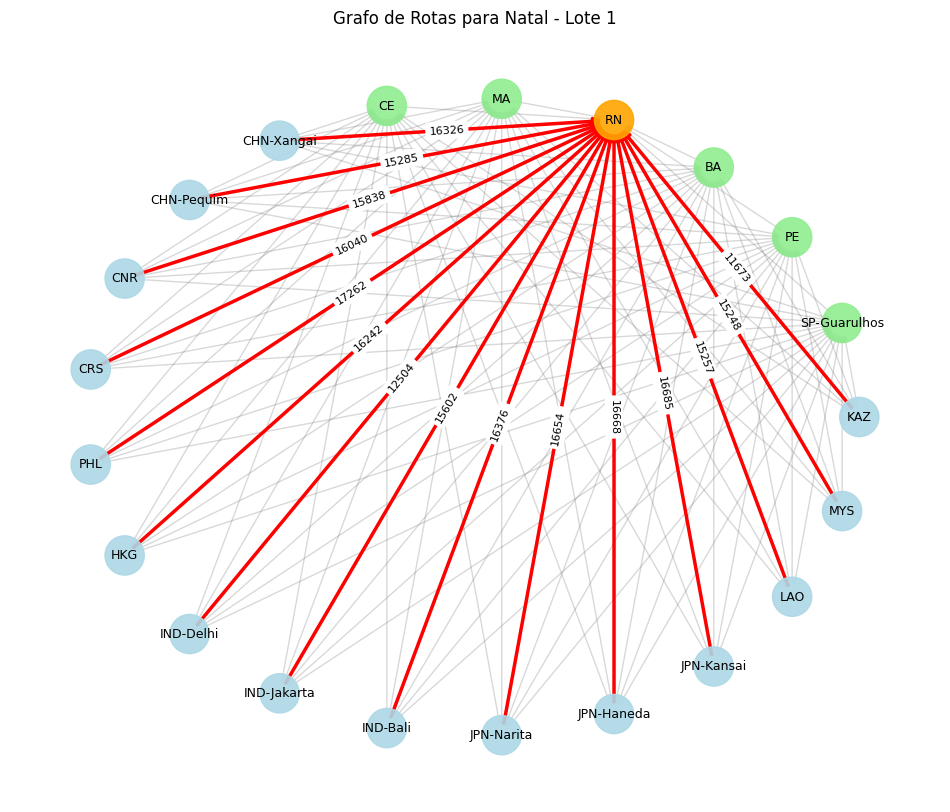

Processando aeroportos: ['Aeroporto Internacional de Penang (Penang)', 'Aeroporto Internacional de Malé', 'Aeroporto Internacional de Changi', 'Aeroporto Internacional de Suvarnabhumi', 'Aeroporto Internacional Don Mueang', 'Aeroporto Internacional de Taiwan Taoyuan', 'Aeroporto Internacional de Tan Son Nhat', 'Aeroporto Internacional de Noi Bai', 'Aeroporto de Frankfurt', 'Aeroporto de Dublin', 'Aeroporto de Varsóvia Chopin', 'Aeroporto de Oslo-Gardermoen', 'Aeroporto de Roma-Fiumicino', 'Aeroporto de Milão-Malpensa', 'Aeroporto de Praga']


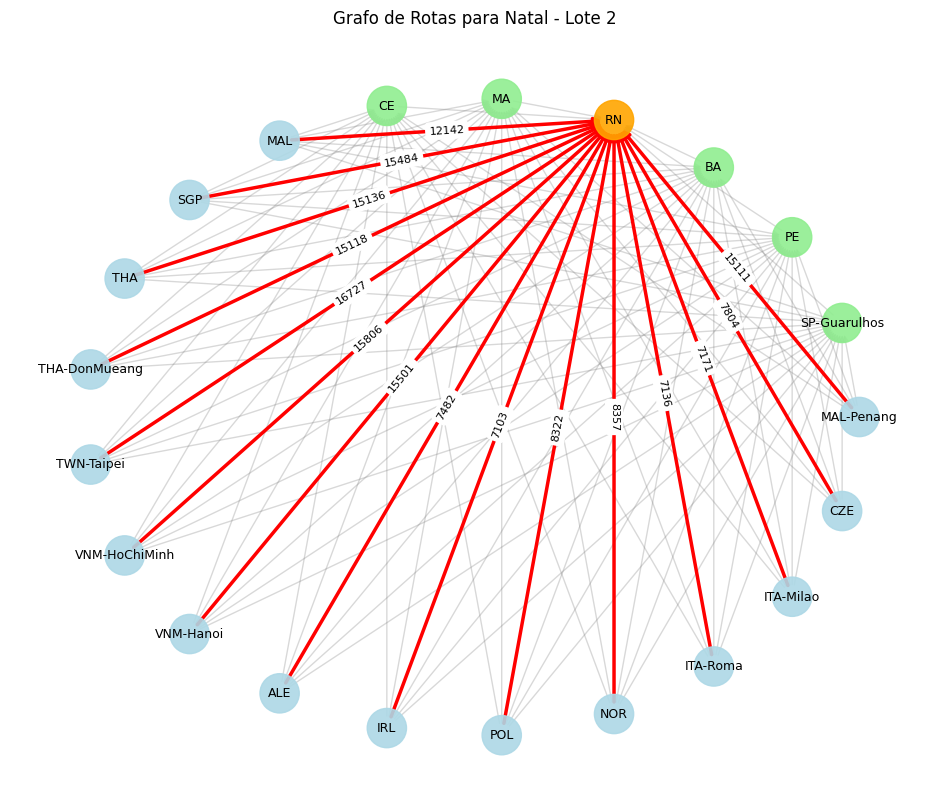

Processando aeroportos: ['Aeroporto de Heathrow (Londres)', 'Aeroporto de Gatwick (Londres)', 'Aeroporto Internacional de Budapeste Ferenc Liszt', 'Aeroporto de Schiphol (Amsterdã)', 'Aeroporto Internacional de Boryspil (Kiev)', 'Aeroporto de Istambul', 'Aeroporto de Zurique', 'Aeroporto de Estocolmo-Arlanda', 'Aeroporto Nikola Tesla (Belgrado)', 'Aeroporto Internacional Sheremetyevo (Moscou)', 'Aeroporto de Pulkovo (São Petersburgo)', 'Aeroporto Internacional Henri Coand? (Bucareste)', 'Aeroporto Humberto Delgado (Lisboa)', 'Aeroporto Francisco Sá Carneiro (Porto)', 'Aeroporto Internacional de Malta']


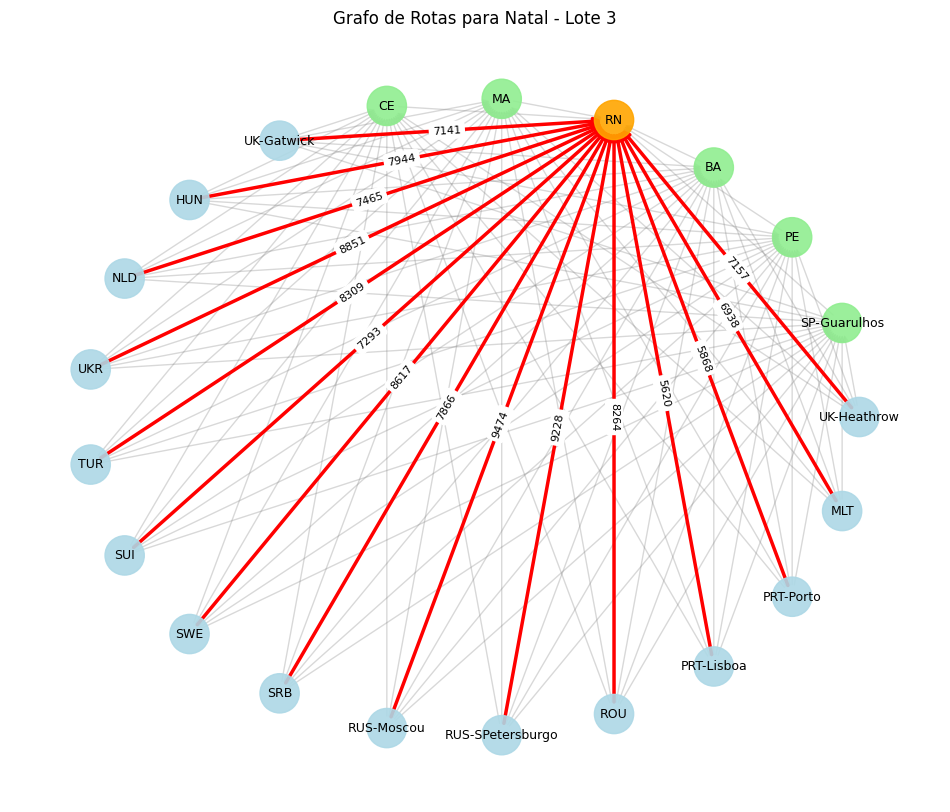

Processando aeroportos: ['Aeroporto de Luxemburgo', 'Aeroporto Internacional de Vilnius', 'Aeroporto Internacional de Riga', 'Aeroporto Internacional Madre Teresa (Tirana)', 'Aeroporto de Barcelona-El Prat (Espanha)', 'Aeroporto de Toulouse-Blagnac (França)', 'Aeroporto Internacional de Viena', 'Aeroporto de Bruxelas', 'Aeroporto de Sófia', 'Aeroporto de Bratislava', 'Aeroporto de Ljubljana Jo\x9ee Pu?nik', 'Aeroporto Adolfo Suárez Madrid-Barajas', 'Aeroporto de Barcelona-El Prat', 'Aeroporto de Tallinn', 'Aeroporto de Vágar']


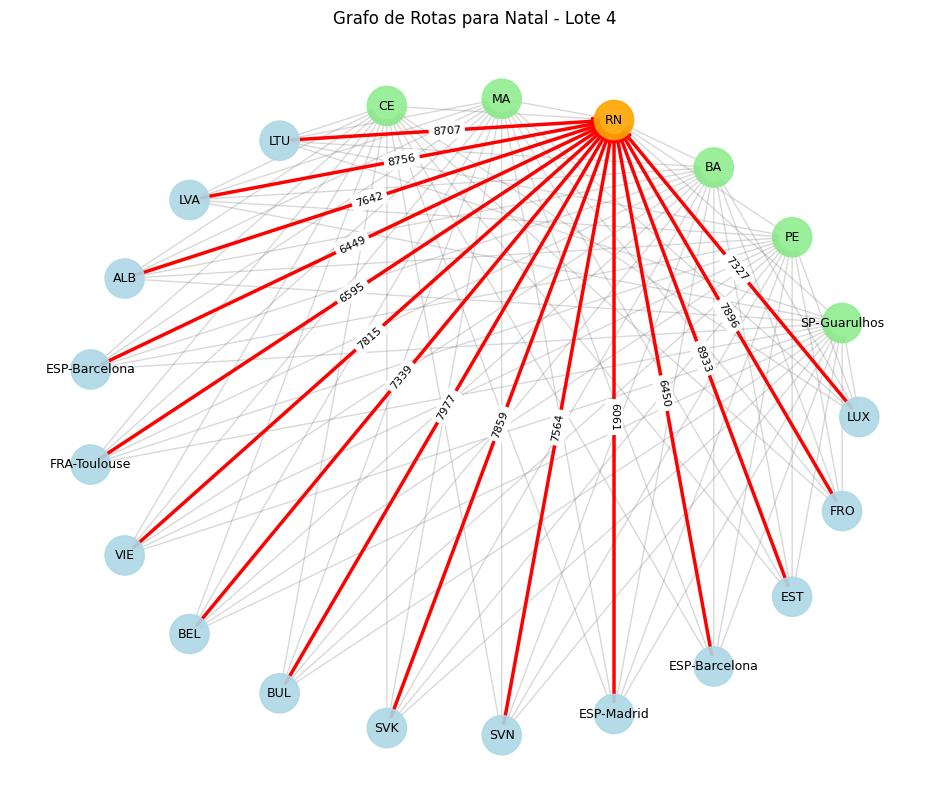

Processando aeroportos: ['Aeroporto de Helsinque']


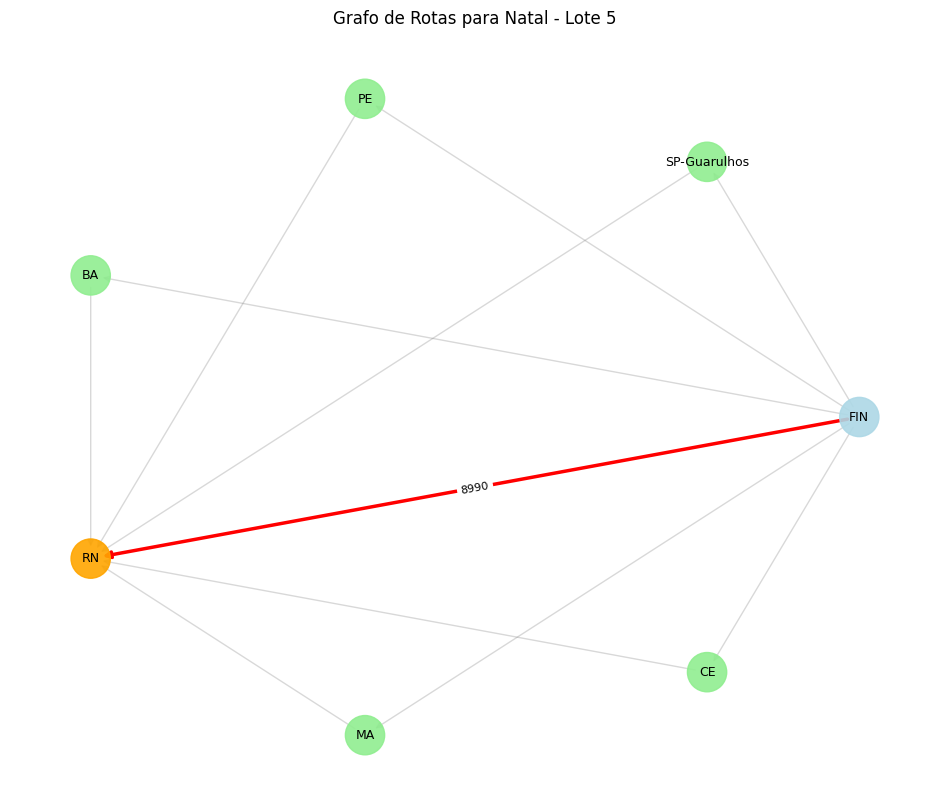

In [ ]:
# Função para carregar o grafo com penalidades para destinos que não são Natal
def load_graph_from_df(df, source_airports, interest_airports, natal_airport):
    distancia_natal = {
        "Aeroporto Internacional de Guarulhos": dist_sp,
        "Aeroporto Internacional do Recife": dist_pe,
        "Aeroporto Internacional de Salvador": dist_ba,
        "Aeroporto Internacional de São Luís": dist_ma,
        "Aeroporto Internacional de Fortaleza": dist_ce,
    }
    filtered_df = df[
        (df['InputID'].isin(source_airports)) & 
        (df['TargetID'].isin(interest_airports))
    ]
    G = nx.DiGraph()
    for _, linha in filtered_df.iterrows():
        source = linha['InputID']
        target = linha['TargetID']
        weight = linha['Distância km']
        if target != natal_airport:
            weight += distancia_natal.get(source, 0)
        G.add_edge(source, target, weight=weight)
    for airport in distancia_natal:
        if not G.has_edge(airport, natal_airport):
            weight = distancia_natal[airport]
            G.add_edge(airport, natal_airport, weight=weight)
    return G

# Função para destacar as rotas ideais para Natal
def highlight_routes(G, source_airports, natal_airport):
    ideal_path_edges = set()
    for source in source_airports:
        try:
            path = nx.shortest_path(G, source=source, target=natal_airport, weight='weight')
            for i in range(len(path) - 1):
                edge = (path[i], path[i + 1])
                ideal_path_edges.add(edge)
        except nx.NetworkXNoPath:
            continue
    return list(ideal_path_edges)

# Função para plotar o grafo com rotas ideais para Natal
def plot_clean_graph(G, ideal_path_edges, local_airports, interest_airports, title_suffix):
    pos = nx.circular_layout(G)
    plt.figure(figsize=(12, 10))
    node_colors = [
        'orange' if node in local_airports else 'lightgreen' if node in interest_airports else 'lightblue'
        for node in G.nodes
    ]
    node_labels = {
        node: aeroportos_nome[node] for node in G.nodes
    }
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, alpha=0.9)
    regular_edges = [edge for edge in G.edges if edge not in ideal_path_edges]
    nx.draw_networkx_edges(G, pos, edgelist=regular_edges, edge_color='gray', alpha=0.3, width=1)
    nx.draw_networkx_edges(G, pos, edgelist=ideal_path_edges, edge_color='red', width=2.5)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=9, font_color='black')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    highlighted_labels = {edge: f"{weight}" for edge, weight in edge_labels.items() if edge in ideal_path_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=highlighted_labels, font_size=8)
    plt.title(f'Grafo de Rotas para Natal - {title_suffix}')
    plt.axis('off')
    plt.show()

# Processar os aeroportos em grupos de 15
batch_size = 15
natal = 'Aeroporto Internacional de Natal'
for i in range(0, len(lista_origem), batch_size):
    subset_origem = lista_origem[i:i + batch_size]
    print(f"Processando aeroportos: {subset_origem}")
    G = load_graph_from_df(df, subset_origem, aeroportos_interesse, natal)
    ideal_path_edges = highlight_routes(G, subset_origem, natal)
    plot_clean_graph(G, ideal_path_edges, natal, aeroportos_interesse, title_suffix=f"Lote {i // batch_size + 1}")

# Tabela comparativa para Natal

In [ ]:
result = []

#Passa por todos os aeroportos internacionais
for i in lista_origem:

    # Inicializando dados para cada aeroporto nacional
    sp = [None, None, None, None]
    pe = [None, None, None, None]
    ba = [None, None, None, None]
    rn = [None, None, None, None]
    ma = [None, None, None, None]
    ce = [None, None, None, None]
    
    #Passa por todos os aeroportos nacionais
    for j in aeroportos_interesse:

        #Seleciona a linha com as informações sobre o aeroporto internacional i e o aerporto nacional j
        linha = df.loc[(df['InputID'] == i) & (df['TargetID'] == j)]
        
        if not linha.empty:  # Certificar que a linha existe no dataset
            #Armazena as informações referentes a essa linha nas variáveis
            distancia = linha['Distância km'].values[0]
            emissao = linha['Emissão de CO2'].values[0]
            tempo_comercial = linha['Tempo Médio Horas - Comercial'].values[0]
            tempo_carga = linha['Tempo Médio Horas - Cargueiro'].values[0]
            
            #Verifica qual o aeroporto que está sendo analisado e armazena as informações na variável correta
            if j == "Aeroporto Internacional de Guarulhos":
                sp = [distancia, emissao, tempo_comercial, tempo_carga]
            elif j == "Aeroporto Internacional do Recife":
                pe = [distancia, emissao, tempo_comercial, tempo_carga]
            elif j == "Aeroporto Internacional de Salvador":
                ba = [distancia, emissao, tempo_comercial, tempo_carga]
            elif j == "Aeroporto Internacional de Natal":
                rn = [distancia, emissao, tempo_comercial, tempo_carga]
            elif j == "Aeroporto Internacional de São Luís":
                ma = [distancia, emissao, tempo_comercial, tempo_carga]
            else:
                ce = [distancia, emissao, tempo_comercial, tempo_carga]
    
    # Adiciona os dados para a origem atual no resultado
    result.append({
        "Origem": i,
        "São Paulo - Guarulhos (Km)": sp[0],
        "São Paulo - Guarulhos (Kg)": sp[1],
        "São Paulo - Guarulhos (Hr - Comercial)": sp[2],
        "São Paulo - Guarulhos (Hr - Cargueiro)": sp[3],
        "Recife - Guararapes (Km)": pe[0],
        "Recife - Guararapes (Kg)": pe[1],
        "Recife - Guararapes (Hr - Comercial)": pe[2],
        "Recife - Guararapes (Hr - Cargueiro)": pe[3],
        "Salvador - Dpt. Magalhães (Km)": ba[0],
        "Salvador - Dpt. Magalhães (Kg)": ba[1],
        "Salvador - Dpt. Magalhães (Hr - Comercial)": ba[2],
        "Salvador - Dpt. Magalhães (Hr - Cargueiro)": ba[3],
        "Natal - Gov. Alves (Km)": rn[0],
        "Natal - Gov. Alves (Kg)": rn[1],
        "Natal - Gov. Alves (Hr - Comercial)": rn[2],
        "Natal - Gov. Alves (Hr - Cargueiro)": rn[3],
        "São Luiz - Mar. Cunha (Km)": ma[0],
        "São Luiz - Mar. Cunha (Kg)": ma[1],
        "São Luiz - Mar. Cunha (Hr - Comercial)": ma[2],
        "São Luiz - Mar. Cunha (Hr - Cargueiro)": ma[3],
        "Fortaleza - Martins (Km)": ce[0],
        "Fortaleza - Martins (Kg)": ce[1],
        "Fortaleza - Martins (Hr - Comercial)": ce[2],
        "Fortaleza - Martins (Hr - Cargueiro)": ce[3]
    })

#Transforma o dicionário result em um dataframe
df_result = pd.DataFrame(result)
df_result


,Origem,São Paulo - Guarulhos (Km),São Paulo - Guarulhos (Kg),São Paulo - Guarulhos (Hr - Comercial),São Paulo - Guarulhos (Hr - Cargueiro),Recife - Guararapes (Km),Recife - Guararapes (Kg),Recife - Guararapes (Hr - Comercial),Recife - Guararapes (Hr - Cargueiro),Salvador - Dpt. Magalhães (Km),...,Natal - Gov. Alves (Hr - Comercial),Natal - Gov. Alves (Hr - Cargueiro),São Luiz - Mar. Cunha (Km),São Luiz - Mar. Cunha (Kg),São Luiz - Mar. Cunha (Hr - Comercial),São Luiz - Mar. Cunha (Hr - Cargueiro),Fortaleza - Martins (Km),Fortaleza - Martins (Kg),Fortaleza - Martins (Hr - Comercial),Fortaleza - Martins (Hr - Cargueiro)
0,Aeroporto Internacional de Nursultan Nazarbayev,13941,1714.743,15:29 ~ 16:24,16:24 ~ 17:25,11852,1457.796,13:10 ~ 13:56,13:56 ~ 14:48,12498,...,12:58 ~ 13:43,13:43 ~ 14:35,12004,1476.492,13:20 ~ 14:07,14:07 ~ 15:00,11724,1442.052,13:01 ~ 13:47,13:47 ~ 14:39
1,Aeroporto Internacional de Xangai Pudong,18581,2285.463,20:38 ~ 21:51,21:51 ~ 23:13,16506,2030.238,18:20 ~ 19:25,19:25 ~ 20:37,17150,...,18:08 ~ 19:12,19:12 ~ 20:24,16524,2032.452,18:21 ~ 19:26,19:26 ~ 20:39,16349,2010.927,18:09 ~ 19:14,19:14 ~ 20:26
2,Aeroporto Internacional de Pequim Capital,17578,2162.094,19:31 ~ 20:40,20:40 ~ 21:58,15483,1904.409,17:12 ~ 18:12,18:12 ~ 19:21,16130,...,16:59 ~ 17:58,17:58 ~ 19:06,15429,1897.767,17:08 ~ 18:09,18:09 ~ 19:17,15276,1878.948,16:58 ~ 17:58,17:58 ~ 19:05
3,Aeroporto Internacional de Pyongyang Sunan,18106,2227.038,20:07 ~ 21:18,21:18 ~ 22:37,16057,1975.011,17:50 ~ 18:53,18:53 ~ 20:04,16696,...,17:35 ~ 18:37,18:37 ~ 19:47,15821,1945.983,17:34 ~ 18:36,18:36 ~ 19:46,15769,1939.587,17:31 ~ 18:33,18:33 ~ 19:42
4,Aeroporto Internacional de Incheon,18312,2252.376,20:20 ~ 21:32,21:32 ~ 22:53,16257,1999.611,18:03 ~ 19:07,19:07 ~ 20:19,16898,...,17:49 ~ 18:52,18:52 ~ 20:03,16028,1971.444,17:48 ~ 18:51,18:51 ~ 20:02,15975,1964.925,17:45 ~ 18:47,18:47 ~ 19:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Aeroporto Adolfo Suárez Madrid-Barajas,8355,1027.665,09:16 ~ 09:49,09:49 ~ 10:26,6271,771.333,06:58 ~ 07:22,07:22 ~ 07:50,6915,...,06:44 ~ 07:07,07:07 ~ 07:34,6310,776.130,07:00 ~ 07:25,07:25 ~ 07:53,6059,745.257,06:43 ~ 07:07,07:07 ~ 07:34
57,Aeroporto de Barcelona-El Prat,8743,1075.389,09:42 ~ 10:17,10:17 ~ 10:55,6650,817.950,07:23 ~ 07:49,07:49 ~ 08:18,7297,...,07:10 ~ 07:35,07:35 ~ 08:03,6745,829.635,07:29 ~ 07:56,07:56 ~ 08:25,6469,795.687,07:11 ~ 07:36,07:36 ~ 08:05
58,Aeroporto de Tallinn,11222,1380.306,12:28 ~ 13:12,13:12 ~ 14:01,9149,1125.327,10:09 ~ 10:45,10:45 ~ 11:26,9790,...,09:55 ~ 10:30,10:30 ~ 11:09,9086,1117.578,10:05 ~ 10:41,10:41 ~ 11:21,8902,1094.946,09:53 ~ 10:28,10:28 ~ 11:07
59,Aeroporto de Vágar,10097,1241.931,11:13 ~ 11:52,11:52 ~ 12:37,8140,1001.220,09:02 ~ 09:34,09:34 ~ 10:10,8743,...,08:46 ~ 09:17,09:17 ~ 09:52,7823,962.229,08:41 ~ 09:12,09:12 ~ 09:46,7771,955.833,08:38 ~ 09:08,09:08 ~ 09:42


In [ ]:
# Ordenar o DataFrame pelo valor da coluna "São Paulo - Guarulhos (Km)"
df_result_sorted = df_result.sort_values(by="São Paulo - Guarulhos (Km)", ascending=True).reset_index(drop=True)

df_result_sorted.to_csv('./csv_gerado/Tabela_Completa.csv', index=False)

#Adicionar coluna de frete

#Eventualmente o código vai ter outro cálculo de CO2

#Incluir CO2 extra

df_result_sorted

,Origem,São Paulo - Guarulhos (Km),São Paulo - Guarulhos (Kg),São Paulo - Guarulhos (Hr - Comercial),São Paulo - Guarulhos (Hr - Cargueiro),Recife - Guararapes (Km),Recife - Guararapes (Kg),Recife - Guararapes (Hr - Comercial),Recife - Guararapes (Hr - Cargueiro),Salvador - Dpt. Magalhães (Km),...,Natal - Gov. Alves (Hr - Comercial),Natal - Gov. Alves (Hr - Cargueiro),São Luiz - Mar. Cunha (Km),São Luiz - Mar. Cunha (Kg),São Luiz - Mar. Cunha (Hr - Comercial),São Luiz - Mar. Cunha (Hr - Cargueiro),Fortaleza - Martins (Km),Fortaleza - Martins (Kg),Fortaleza - Martins (Hr - Comercial),Fortaleza - Martins (Hr - Cargueiro)
0,Aeroporto Humberto Delgado (Lisboa),7909,972.807,08:47 ~ 09:18,09:18 ~ 09:53,5837,717.951,06:29 ~ 06:52,06:52 ~ 07:17,6477,...,06:14 ~ 06:36,06:36 ~ 07:01,5823,716.229,06:28 ~ 06:51,06:51 ~ 07:16,5596,688.308,06:13 ~ 06:35,06:35 ~ 06:59
1,Aeroporto Francisco Sá Carneiro (Porto),8154,1002.942,09:03 ~ 09:35,09:35 ~ 10:11,6089,748.947,06:45 ~ 07:09,07:09 ~ 07:36,6726,...,06:31 ~ 06:54,06:54 ~ 07:20,6042,743.166,06:42 ~ 07:06,07:06 ~ 07:33,5834,717.582,06:28 ~ 06:51,06:51 ~ 07:17
2,Aeroporto Adolfo Suárez Madrid-Barajas,8355,1027.665,09:16 ~ 09:49,09:49 ~ 10:26,6271,771.333,06:58 ~ 07:22,07:22 ~ 07:50,6915,...,06:44 ~ 07:07,07:07 ~ 07:34,6310,776.130,07:00 ~ 07:25,07:25 ~ 07:53,6059,745.257,06:43 ~ 07:07,07:07 ~ 07:34
3,Aeroporto de Barcelona-El Prat (Espanha),8742,1075.266,09:42 ~ 10:17,10:17 ~ 10:55,6650,817.950,07:23 ~ 07:49,07:49 ~ 08:18,7296,...,07:09 ~ 07:35,07:35 ~ 08:03,6745,829.635,07:29 ~ 07:56,07:56 ~ 08:25,6468,795.564,07:11 ~ 07:36,07:36 ~ 08:05
4,Aeroporto de Barcelona-El Prat,8743,1075.389,09:42 ~ 10:17,10:17 ~ 10:55,6650,817.950,07:23 ~ 07:49,07:49 ~ 08:18,7297,...,07:10 ~ 07:35,07:35 ~ 08:03,6745,829.635,07:29 ~ 07:56,07:56 ~ 08:25,6469,795.687,07:11 ~ 07:36,07:36 ~ 08:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Aeroporto Internacional de Narita (Tóquio),18490,2274.270,20:32 ~ 21:45,21:45 ~ 23:06,16907,2079.561,18:47 ~ 19:53,19:53 ~ 21:08,17469,...,18:30 ~ 19:35,19:35 ~ 20:49,16301,2005.023,18:06 ~ 19:10,19:10 ~ 20:22,16460,2024.580,18:17 ~ 19:21,19:21 ~ 20:34
57,Aeroporto Internacional de Haneda (Tóquio),18535,2279.805,20:35 ~ 21:48,21:48 ~ 23:10,16920,2081.160,18:48 ~ 19:54,19:54 ~ 21:08,17489,...,18:31 ~ 19:36,19:36 ~ 20:50,16332,2008.836,18:08 ~ 19:12,19:12 ~ 20:24,16481,2027.163,18:18 ~ 19:23,19:23 ~ 20:36
58,Aeroporto Internacional de Xangai Pudong,18581,2285.463,20:38 ~ 21:51,21:51 ~ 23:13,16506,2030.238,18:20 ~ 19:25,19:25 ~ 20:37,17150,...,18:08 ~ 19:12,19:12 ~ 20:24,16524,2032.452,18:21 ~ 19:26,19:26 ~ 20:39,16349,2010.927,18:09 ~ 19:14,19:14 ~ 20:26
59,Aeroporto Internacional de Taiwan Taoyuan,18769,2308.587,20:51 ~ 22:04,22:04 ~ 23:27,16872,2075.256,18:44 ~ 19:50,19:50 ~ 21:05,17491,...,18:35 ~ 19:40,19:40 ~ 20:54,17075,2100.225,18:58 ~ 20:05,20:05 ~ 21:20,16816,2068.368,18:41 ~ 19:47,19:47 ~ 21:01


In [ ]:
# DataFrame apenas com as distâncias e as origens
df_distancias = df_result.filter([
    "Origem",
    "São Paulo - Guarulhos (Km)",
    "Recife - Guararapes (Km)",
    "Salvador - Dpt. Magalhães (Km)",
    "Natal - Gov. Alves (Km)",
    "São Luiz - Mar. Cunha (Km)",
    "Fortaleza - Martins (Km)"
])

# DataFrame apenas com as emissões e as origens
df_emissoes = df_result.filter([
    "Origem",
    "São Paulo - Guarulhos (Kg)",
    "Recife - Guararapes (Kg)",
    "Salvador - Dpt. Magalhães (Kg)",
    "Natal - Gov. Alves (Kg)",
    "São Luiz - Mar. Cunha (Kg)",
    "Fortaleza - Martins (Kg)"
])

# DataFrame apenas com os tempos de voo comercial e as origens
df_tempo_comercial = df_result.filter([
    "Origem",
    "São Paulo - Guarulhos (Hr - Comercial)",
    "Recife - Guararapes (Hr - Comercial)",
    "Salvador - Dpt. Magalhães (Hr - Comercial)",
    "Natal - Gov. Alves (Hr - Comercial)",
    "São Luiz - Mar. Cunha (Hr - Comercial)",
    "Fortaleza - Martins (Hr - Comercial)"
])

# DataFrame apenas com os tempos de voo de carga e as origens
df_tempo_carga = df_result.filter([
    "Origem",
    "São Paulo - Guarulhos (Hr - Cargueiro)",
    "Recife - Guararapes (Hr - Cargueiro)",
    "Salvador - Dpt. Magalhães (Hr - Cargueiro)",
    "Natal - Gov. Alves (Hr - Cargueiro)",
    "São Luiz - Mar. Cunha (Hr - Cargueiro)",
    "Fortaleza - Martins (Hr - Cargueiro)"
])

# Exportar os DataFrames para CSV
df_distancias.to_csv('./csv_gerado/Tabela_Distâncias.csv', index=False)
df_emissoes.to_csv('./csv_gerado/Tabela_Emissão.csv', index=False)
df_tempo_comercial.to_csv('./csv_gerado/Tabela_Tempo_Comercial.csv', index=False)
df_tempo_carga.to_csv('./csv_gerado/Tabela_Tempo_Carga.csv', index=False)

df_distancias


,Origem,São Paulo - Guarulhos (Km),Recife - Guararapes (Km),Salvador - Dpt. Magalhães (Km),Natal - Gov. Alves (Km),São Luiz - Mar. Cunha (Km),Fortaleza - Martins (Km)
0,Aeroporto Internacional de Nursultan Nazarbayev,13941,11852,12498,11673,12004,11724
1,Aeroporto Internacional de Xangai Pudong,18581,16506,17150,16326,16524,16349
2,Aeroporto Internacional de Pequim Capital,17578,15483,16130,15285,15429,15276
3,Aeroporto Internacional de Pyongyang Sunan,18106,16057,16696,15838,15821,15769
4,Aeroporto Internacional de Incheon,18312,16257,16898,16040,16028,15975
...,...,...,...,...,...,...,...
56,Aeroporto Adolfo Suárez Madrid-Barajas,8355,6271,6915,6061,6310,6059
57,Aeroporto de Barcelona-El Prat,8743,6650,7297,6450,6745,6469
58,Aeroporto de Tallinn,11222,9149,9790,8933,9086,8902
59,Aeroporto de Vágar,10097,8140,8743,7896,7823,7771


In [102]:
tabela_hub

,Destino,Origem,Intermerdiario,Final,Distancia
0,Alagoas,Aeroporto Internacional de Xangai Pudong,Aeroporto Internacional do Recife,Aeroporto Internacional de Maceió,16642
1,Alagoas,Aeroporto Internacional de Pequim Capital,Aeroporto Internacional do Recife,Aeroporto Internacional de Maceió,15619
2,Alagoas,Aeroporto Internacional de Taiwan Taoyuan,Aeroporto Internacional do Recife,Aeroporto Internacional de Maceió,17008
3,Alagoas,Aeroporto de Barcelona-El Prat (Espanha),Aeroporto Internacional do Recife,Aeroporto Internacional de Maceió,6786
4,Alagoas,Aeroporto de Heathrow (Londres),Aeroporto Internacional do Recife,Aeroporto Internacional de Maceió,7518
...,...,...,...,...,...
442,Sergipe,Aeroporto Internacional de Kuala Lumpur (Sepang),Aeroporto Internacional do Recife,Aeroporto Internacional de Aracaju,15587
443,Sergipe,Aeroporto Internacional de Haneda (Tóquio),Aeroporto Internacional de Natal,Aeroporto Internacional de Aracaju,17274
444,Sergipe,Aeroporto Internacional de Budapeste Ferenc Liszt,Aeroporto Internacional do Recife,Aeroporto Internacional de Aracaju,8526
445,Sergipe,Aeroporto Internacional Don Mueang,Aeroporto Internacional do Recife,Aeroporto Internacional de Aracaju,15531


In [103]:
tabela_rotas

[]